# Firearm Seizures Data Set Analysis

In [ ]:
import pandas as pd
import numpy as np
firearmseizures = pd.read_csv("firearmseizures.csv")
firearmseizures = firearmseizures.dropna()
import matplotlib.pyplot as plt
import fpsnippets 

# Introduction


* I chose the Firearm Seizures dataset in Pittsburgh. I decided to specifically use the total gun count per neighborhood to figure out the most dangerous neighborhood to walk in because if there's a large number of guns, then most likely it will be a very unsafe area.



In [51]:
print("There are a total of", (firearmseizures["total_count"].sum()), "guns seized")
print("There are a total of ", len(firearmseizures["neighborhood"].unique()), "neighborhoods where the data was recorded") 
firearmseizures['neighborhood'].value_counts()

There are a total of 4812 guns seized
There are a total of  87 neighborhoods where the data was recorded


Homewood South      249
South Side Flats    178
Homewood North      130
Carrick             117
Perry South         112
                   ... 
Chartiers City        4
Mt. Oliver            4
Friendship            3
Summer Hill           2
Swisshelm Park        1
Name: neighborhood, Length: 87, dtype: int64

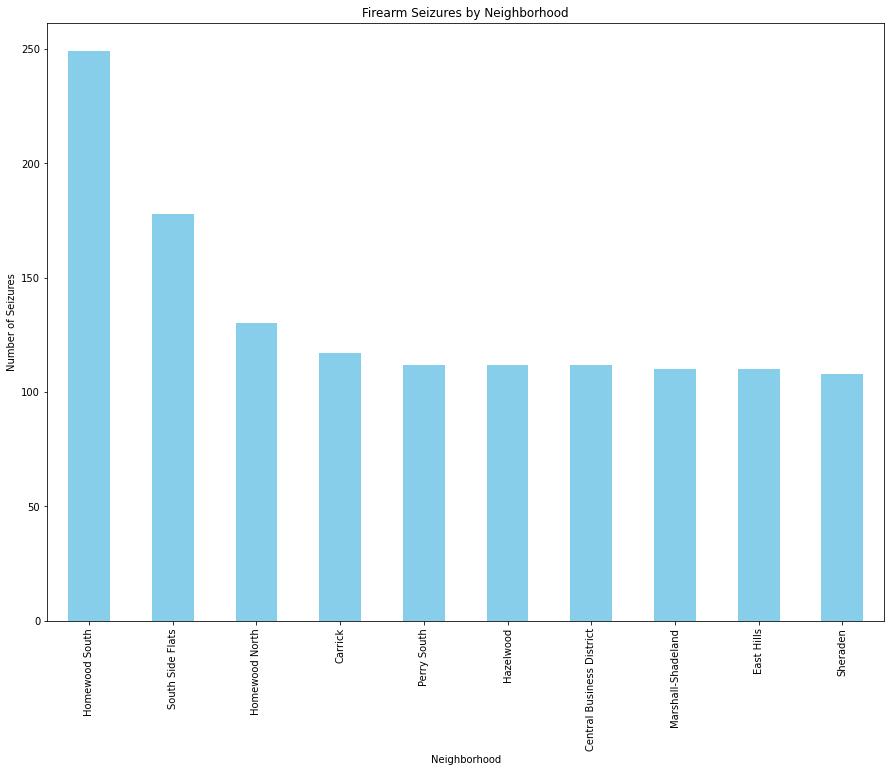

In [52]:
neighborhood_counts = firearmseizures['neighborhood'].value_counts().nlargest(10)
neighborhood_counts.plot(kind='bar', figsize=(15, 11), color='skyblue')
plt.title('Firearm Seizures by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Seizures')
plt.show()

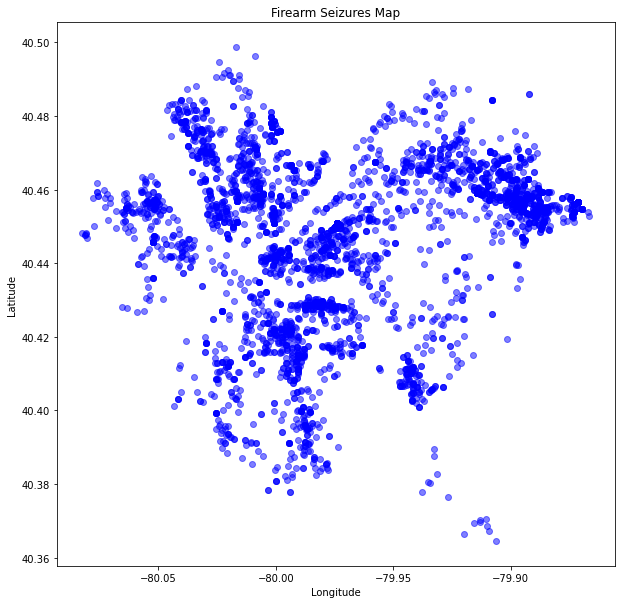

In [54]:
firearmseizures['neighborhood'] = None
for index, row in firearmseizures.iterrows():
    firearmseizures.at[index, 'neighborhood'] = fpsnippets.geo_to_neighborhood(row['latitude'], row['longitude'])
mapDf = pd.merge(firearmseizures, fpsnippets.NEIGHBORHOODS, how='left', left_on='neighborhood', right_on='hood')
plt.figure(figsize=(10, 10))
plt.scatter(mapDf['longitude'], mapDf['latitude'], c='blue', alpha=0.5)
plt.title('Firearm Seizures Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Conclusion

* From this information, I can draw the conclusion that Homewood South is the most unsafe neighborhood in Pittsburgh. I personally have never been there, and haven't been to a lot of neighborhoods in Pittsburgh so I don't have a personal opinion on this but I would definitely have to put more research into these neighborhoods to see how they are really like. If I had to pick my favorite neighborhood, it would probably Oakland because this is where I've spent the most time. 